# Loading the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='notebook',style='darkgrid',palette='deep',font='sans-serif',)
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('SMARTPHONE RETAIL OUTLET SALE DATA.csv',encoding='ascii')

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6421 entries, 0 to 6420
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6421 non-null   object 
 1   F.Y                       6421 non-null   object 
 2   QUARTER                   6421 non-null   int64  
 3   P_NO                      6420 non-null   object 
 4   PAYMENT TYPE              6421 non-null   object 
 5   TYPE OF PRODUCT           6421 non-null   object 
 6   Quantity                  6421 non-null   int64  
 7   Price                     6421 non-null   float64
 8   Amount                    6421 non-null   float64
 9   TYPE OF ACCESSORY/MOBILE  6421 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 501.8+ KB


In [ ]:
#data overview
df.describe()

,QUARTER,Quantity,Price,Amount
count,6421.000000,6421.000000,6421.000000,6421.000000
mean,2.249338,1.058246,18295.175739,19255.968355
std,1.000452,0.949686,19855.194755,20608.895584
min,1.000000,1.000000,410.710000,915.260000
25%,1.000000,1.000000,5026.780000,5892.860000
50%,2.000000,1.000000,13776.780000,14284.820000
75%,3.000000,1.000000,20919.640000,21419.640000
max,4.000000,30.000000,104767.860000,230803.570000


In [ ]:
#cleaning column names
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(" ","_")
df.columns=df.columns.str.replace("/","_")
df.columns=df.columns.str.replace("f.y","fiscal_year")
df.columns

Index(['date', 'fiscal_year', 'quarter', 'p_no', 'payment_type',
       'type_of_product', 'quantity', 'price', 'amount',
       'type_of_accessory_mobile'],
      dtype='object')

In [ ]:
df.columns

Index(['date', 'fiscal_year', 'quarter', 'p_no', 'payment_type',
       'type_of_product', 'quantity', 'price', 'amount',
       'type_of_accessory_mobile'],
      dtype='object')

In [ ]:
#checking for null values
df.isnull().sum()

,0
date,0
fiscal_year,0
quarter,0
p_no,1
payment_type,0
type_of_product,0
quantity,0
price,0
amount,0
type_of_accessory_mobile,0


In [ ]:
#since data has just one value,drop null vales
df.dropna(subset=['p_no'],inplace=True)

In [ ]:
df.isna().sum().any()

np.False_

# Data Visualization

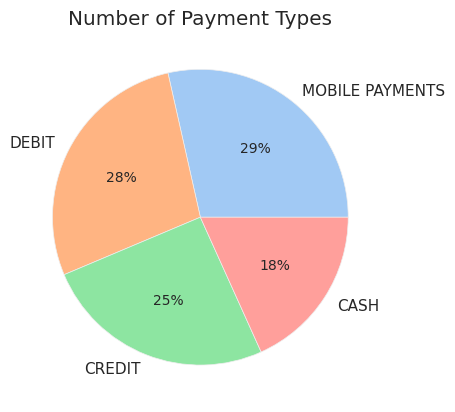

In [ ]:
#qualitative analysis
payment_type_data=df.payment_type.value_counts().reset_index()


data = payment_type_data['count']
labels = payment_type_data['payment_type']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Number of Payment Types')
plt.show();

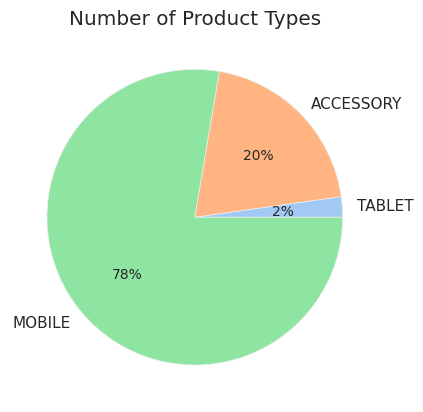

In [ ]:
product_type_data=df.type_of_product.value_counts().sort_values().reset_index()


data = product_type_data['count']
labels = product_type_data['type_of_product']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Number of Product Types')
plt.show();

<ipython-input-136-1ecd963ded93>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  type_of_accessory_mobile_plot=sns.countplot(data=df,y="type_of_accessory_mobile",palette="rocket",order=accessory)


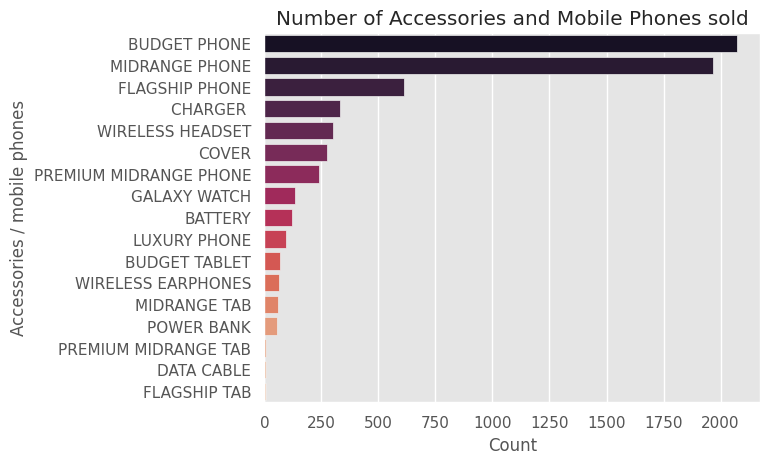

In [ ]:
accessory=df.type_of_accessory_mobile.value_counts().index
type_of_accessory_mobile_plot=sns.countplot(data=df,y="type_of_accessory_mobile",palette="rocket",order=accessory)
type_of_accessory_mobile_plot.set_title("Number of Accessories and Mobile Phones sold")
type_of_accessory_mobile_plot.set_xlabel('Count')
type_of_accessory_mobile_plot.set_ylabel("Accessories / mobile phones");


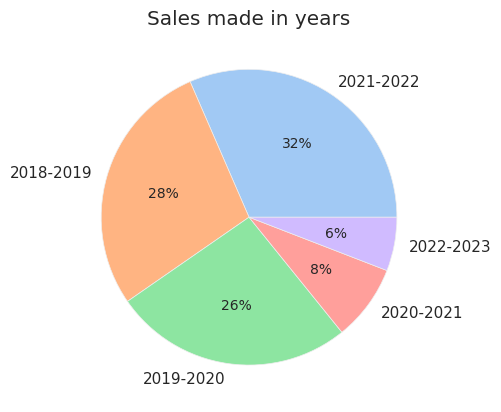

In [ ]:
fiscal_year_data=df.fiscal_year.value_counts().reset_index()


data = fiscal_year_data['count']
labels = fiscal_year_data['fiscal_year']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Sales made in years')
plt.show();

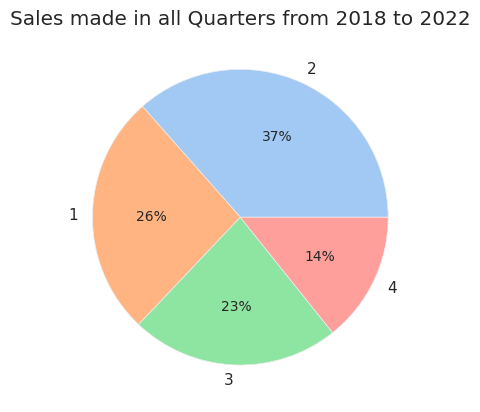

In [ ]:
quarter_data=df.quarter.value_counts().reset_index()

data = quarter_data['count']
labels = quarter_data['quarter']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Sales made in all Quarters from 2018 to 2022')
plt.show();

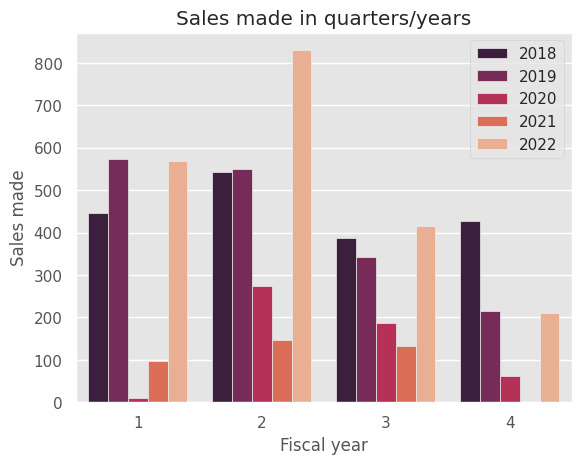

In [ ]:
quarter_plot=sns.countplot(data=df,x="quarter",hue="fiscal_year",palette="rocket")
quarter_plot.set_title('Sales made in quarters/years')
quarter_plot.set_xlabel('Fiscal year')
plt.legend(labels=['2018','2019','2020','2021','2022'])
quarter_plot.set_ylabel('Sales made');

<ipython-input-140-a5ba857b9589>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').sum()


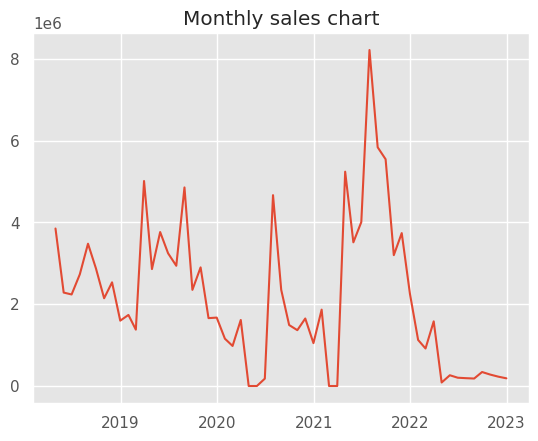

In [ ]:
newdate = pd.to_datetime(df['date'],format='%d-%m-%Y')
df.set_index(newdate, inplace=True)
monthly_sales = df.resample('M').sum()
plt.plot(monthly_sales['amount'])
plt.title('Monthly sales chart');

In [ ]:
# Convert 'Date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Set 'Date' as index
df.set_index('date', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6420 entries, 2018-04-01 to 2021-07-14
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   fiscal_year               6420 non-null   object 
 1   quarter                   6420 non-null   int64  
 2   p_no                      6420 non-null   object 
 3   payment_type              6420 non-null   object 
 4   type_of_product           6420 non-null   object 
 5   quantity                  6420 non-null   int64  
 6   price                     6420 non-null   float64
 7   amount                    6420 non-null   float64
 8   type_of_accessory_mobile  6420 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 501.6+ KB


In [ ]:
# Resample to monthly frequency, summing the 'amount' and 'quantity'
monthly_sales = df.resample('M').agg({'amount': 'sum', 'quantity': 'sum'})

                amount  quantity
date                            
2018-04-30  3851349.91       188
2018-05-31  2284744.70       168
2018-06-30  2238484.60       140
2018-07-31  2730875.95       176
2018-08-31  3479150.55       201


<ipython-input-143-7c7fa4926d0e>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').agg({'amount': 'sum', 'quantity': 'sum'})


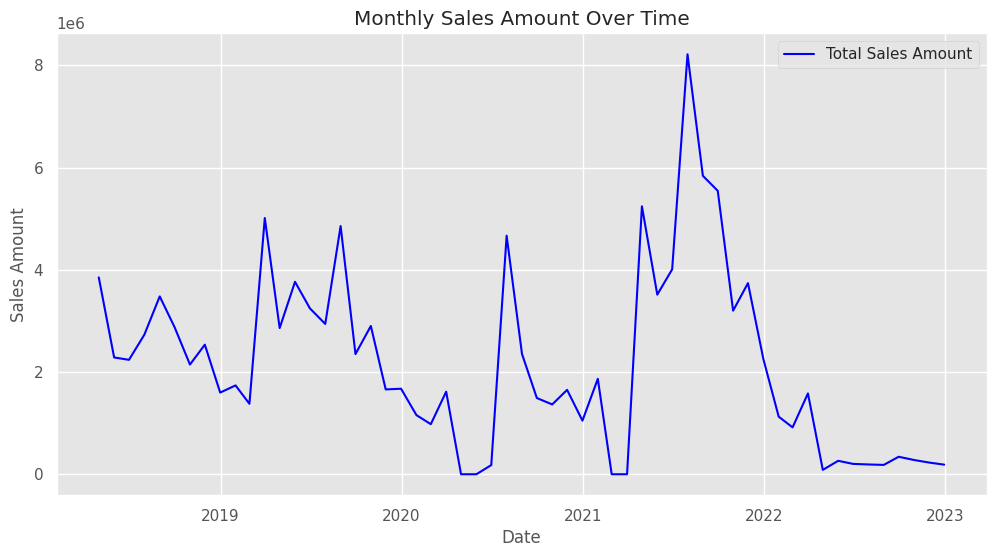

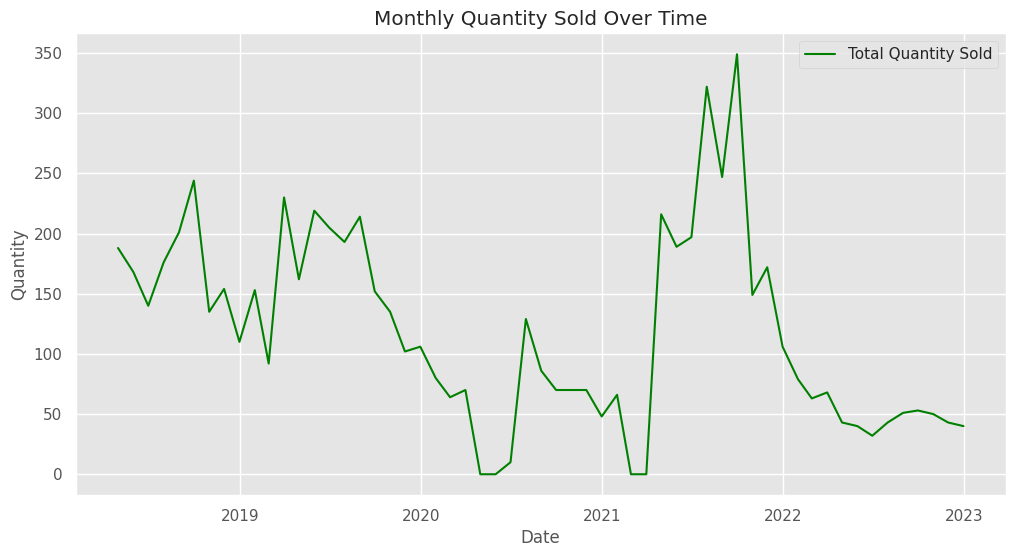

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['amount'], label='Total Sales Amount', color='blue')
plt.title('Monthly Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['quantity'], label='Total Quantity Sold', color='green')
plt.title('Monthly Quantity Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

# Checking the data for analysis and making it ready for Time Series Analysis

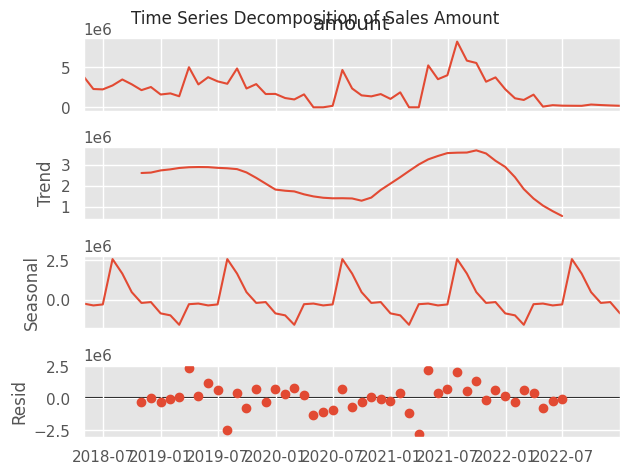

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'amount' series
decomposition = seasonal_decompose(monthly_sales['amount'], model='additive', period=12)  # Assuming yearly seasonality

# Plot the decomposition
decomposition.plot()
plt.suptitle('Time Series Decomposition of Sales Amount')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
y = monthly_sales['amount'].dropna()
# Perform ADF test
result = adfuller(y)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Lags Used:', result[2])
print('Critical Values:', result[4])

# Interpret stationarity
if result[1] < 0.05:
    print("The series is stationary (reject null hypothesis).")
else:
    print("The series is not stationary (fail to reject null hypothesis).")
    # Apply differencing
    y_diff = y.diff().dropna()
    print("\nApplying first-order differencing...")
    # ADF test on differenced series
    result_diff = adfuller(y_diff)
    print('ADF Test on Differenced Series:')
    print('ADF Statistic:', result_diff[0])
    print('p-value:', result_diff[1])
    print('Lags Used:', result_diff[2])
    print('Critical Values:', result_diff[4])
    if result_diff[1] < 0.05:
        print("The differenced series is stationary (reject null hypothesis).")
    else:
        print("The differenced series is not stationary (fail to reject null hypothesis).")

ADF Statistic: -2.4453777507532193
p-value: 0.12933617428838484
Lags Used: 1
Critical Values: {'1%': np.float64(-3.5552728880540942), '5%': np.float64(-2.9157312396694217), '10%': np.float64(-2.5956695041322315)}
The series is not stationary (fail to reject null hypothesis).

Applying first-order differencing...
ADF Test on Differenced Series:
ADF Statistic: -10.637208642554544
p-value: 5.036359083233917e-19
Lags Used: 0
Critical Values: {'1%': np.float64(-3.5552728880540942), '5%': np.float64(-2.9157312396694217), '10%': np.float64(-2.5956695041322315)}
The differenced series is stationary (reject null hypothesis).


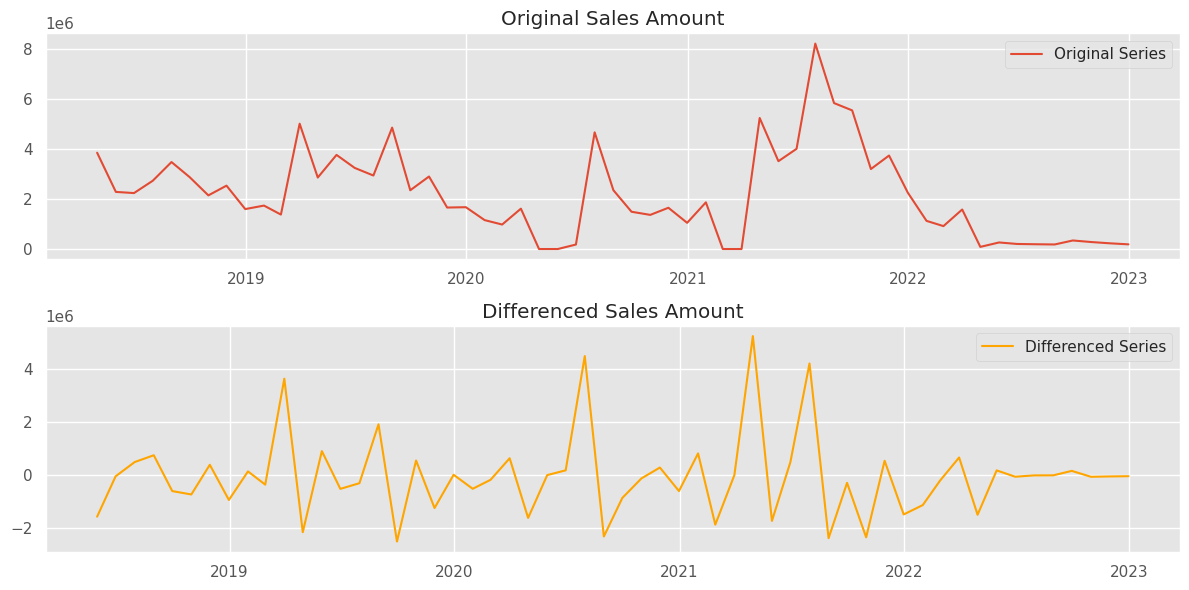

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(y, label='Original Series')
plt.title('Original Sales Amount')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(y_diff, label='Differenced Series', color='orange')
plt.title('Differenced Sales Amount')
plt.legend()
plt.tight_layout()
plt.show()

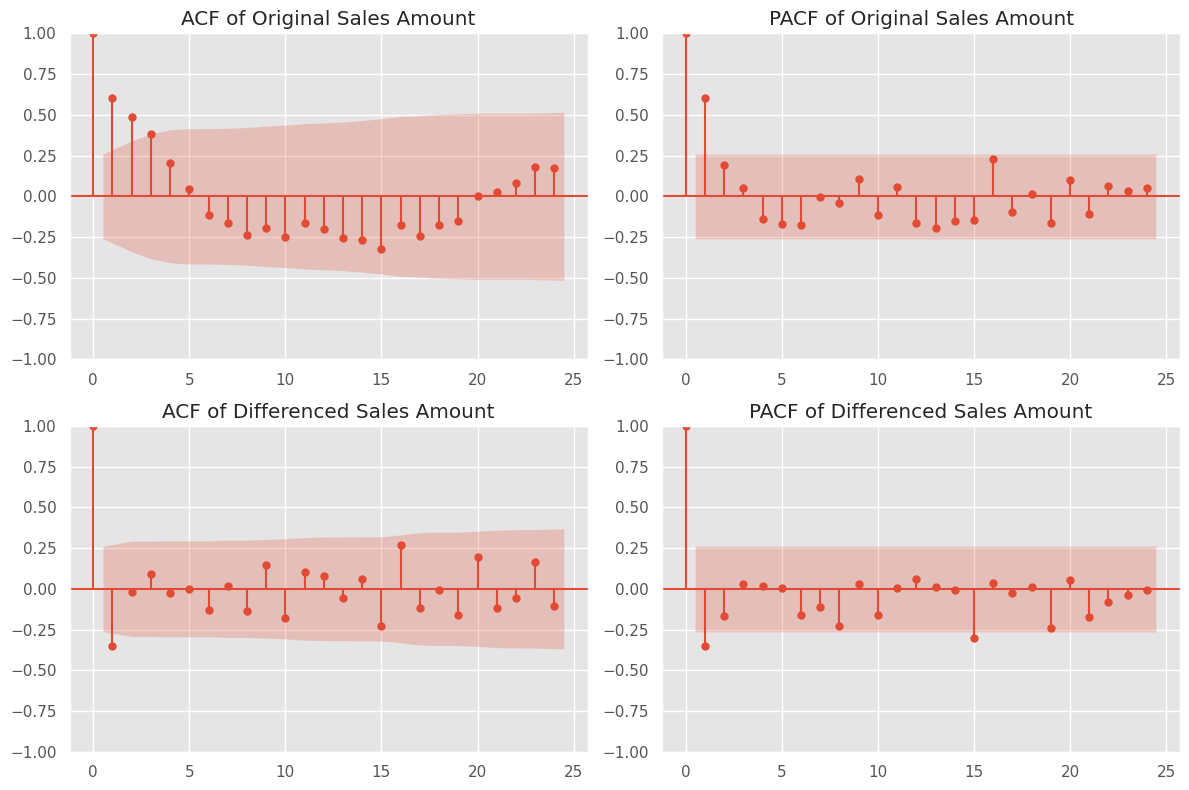

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Verify data
y = monthly_sales['amount'].dropna()

# Compute differenced series
y_diff = y.diff().dropna()

# Plot ACF and PACF for original series
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plot_acf(y, lags=24, ax=plt.gca(), title='ACF of Original Sales Amount')
plt.subplot(2, 2, 2)
plot_pacf(y, lags=24, ax=plt.gca(), title='PACF of Original Sales Amount')

# Plot ACF and PACF for differenced series
plt.subplot(2, 2, 3)
plot_acf(y_diff, lags=24, ax=plt.gca(), title='ACF of Differenced Sales Amount')
plt.subplot(2, 2, 4)
plot_pacf(y_diff, lags=24, ax=plt.gca(), title='PACF of Differenced Sales Amount')

plt.tight_layout()
plt.show()

# ARIMA

                               SARIMAX Results                                
Dep. Variable:                 amount   No. Observations:                   57
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -873.342
Date:                Tue, 15 Apr 2025   AIC                           1754.683
Time:                        01:58:07   BIC                           1762.785
Sample:                    04-30-2018   HQIC                          1757.824
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2218      1.949      0.114      0.909      -3.598       4.042
ma.L1         -0.6459      1.821     -0.355      0.723      -4.214       2.922
ma.L2          0.1798      0.621      0.290      0.7

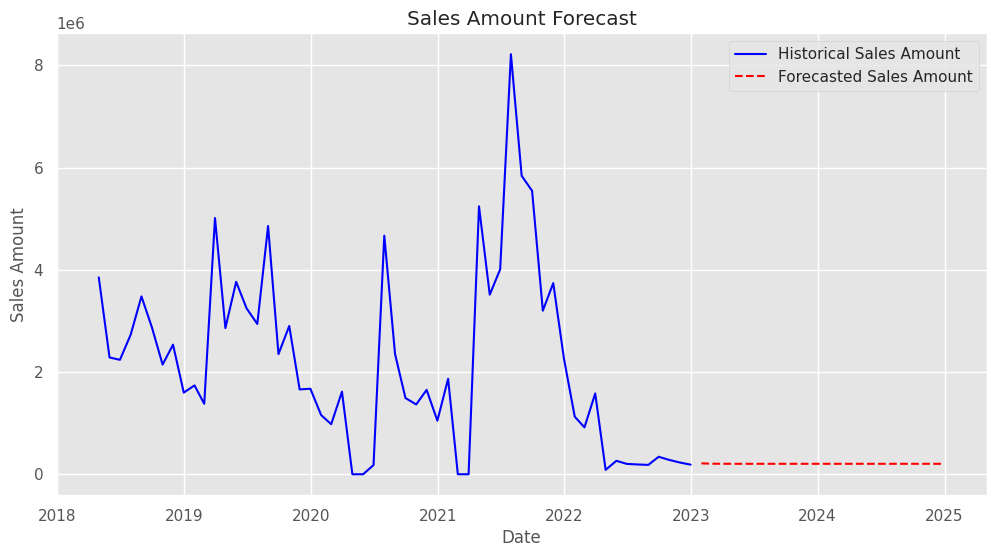

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(monthly_sales['amount'], order=(1, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['amount'], label='Historical Sales Amount', color='blue')
plt.plot(forecast, label='Forecasted Sales Amount', color='red', linestyle='--')
plt.title('Sales Amount Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()

# SARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                        SARIMAX Results                                        
Dep. Variable:                                  amount   No. Observations:                   57
Model:             SARIMAX(1, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.552
Date:                                 Tue, 15 Apr 2025   AIC                           1399.104
Time:                                         01:58:10   BIC                           1409.809
Sample:                                     04-30-2018   HQIC                          1403.074
                                          - 12-31-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1807      1.191     -0.152      0.879      -2.514       2

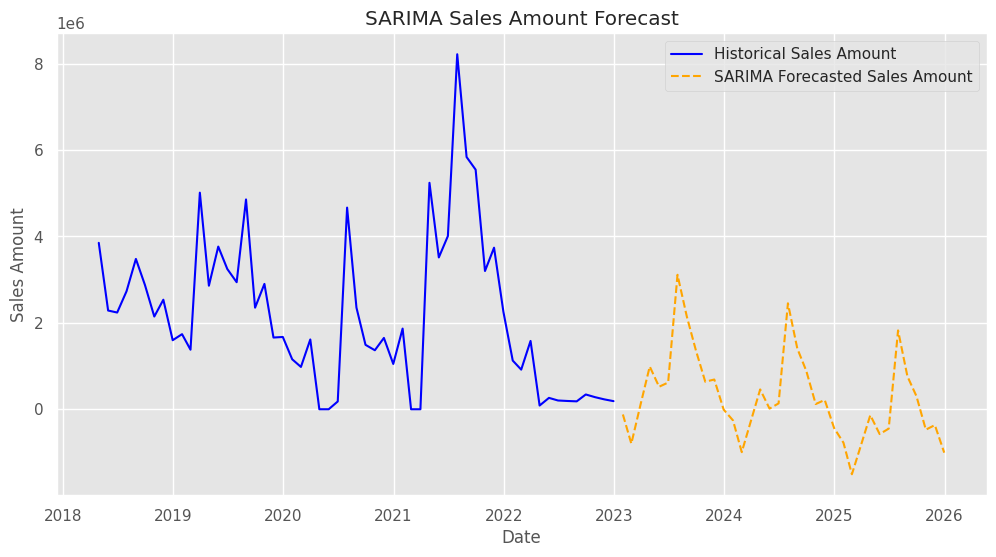

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (assuming yearly seasonality with period=12)
sarima_model = SARIMAX(monthly_sales['amount'], order=(1, 1, 1), seasonal_order=(1, 1, 2, 12))
sarima_fit = sarima_model.fit(disp=False)

# Summary of the model
print(sarima_fit.summary())

# Forecast the next 12 months
sarima_forecast = sarima_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['amount'], label='Historical Sales Amount', color='blue')
plt.plot(sarima_forecast, label='SARIMA Forecasted Sales Amount', color='orange', linestyle='--')
plt.title('SARIMA Sales Amount Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.show()

# Checking the residuals

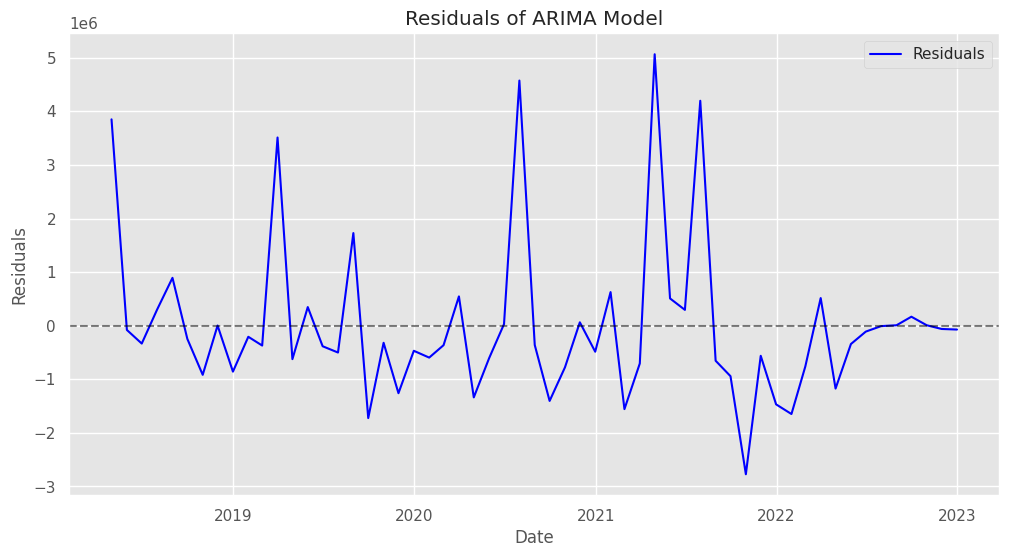

Residuals Mean: 4028.557452620927
Residuals Variance: 2305058529822.227


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Assuming 'model_fit' is the fitted ARIMA model from the previous analysis
# For SARIMA, replace 'model_fit' with 'sarima_fit'
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()

# Summary statistics of residuals
print("Residuals Mean:", residuals.mean())
print("Residuals Variance:", residuals.var())

<Figure size 1200x400 with 0 Axes>

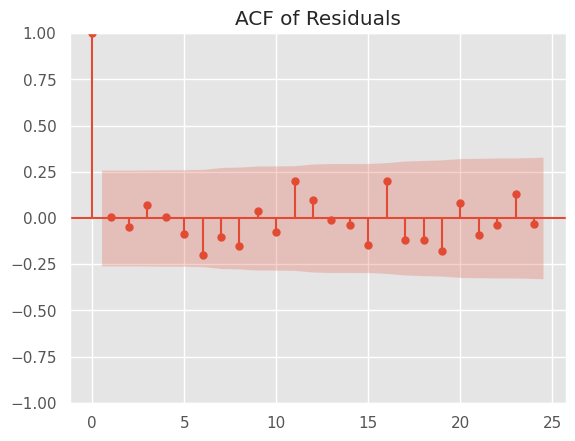

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10   6.506209   0.771094
20  20.993352   0.397524


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# ACF plot of residuals
plt.figure(figsize=(12, 4))
plot_acf(residuals, lags=24, title='ACF of Residuals')
plt.show()

# Ljung-Box test for autocorrelation
lb_test = acorr_ljungbox(residuals, lags=[10, 20], return_df=True)
print("Ljung-Box Test Results:")
print(lb_test)

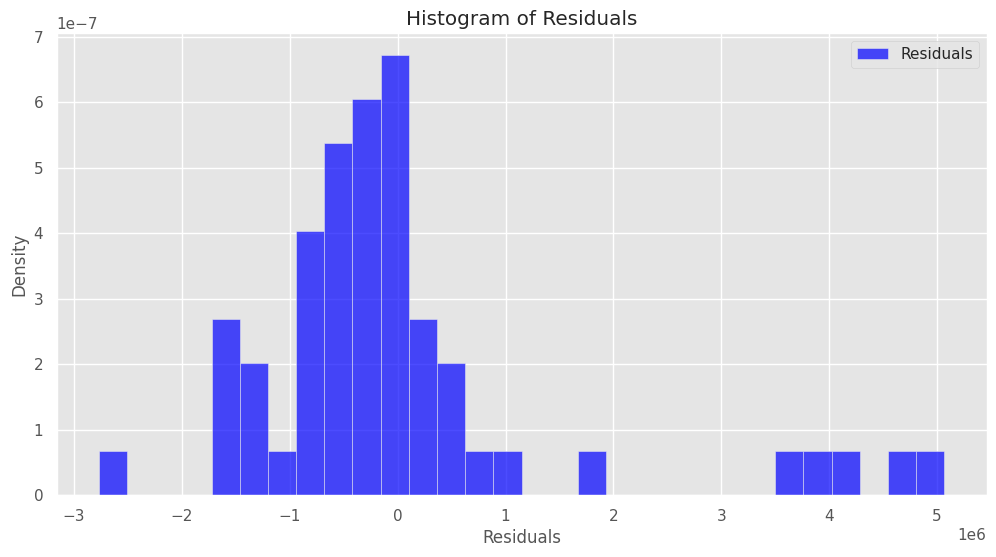

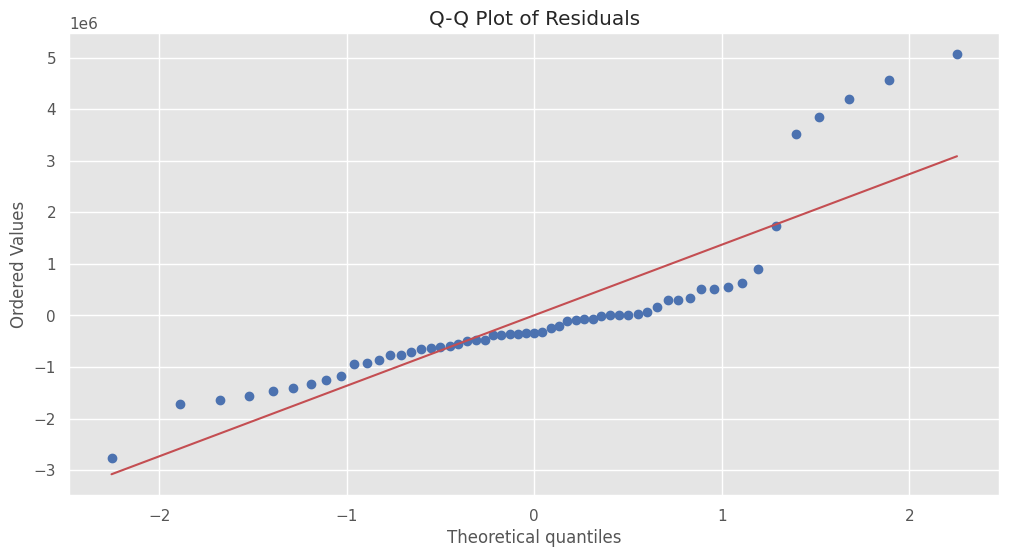

Shapiro-Wilk Test: Statistic=0.783, p-value=0.000
Residuals are not normally distributed (reject H0).


In [ ]:
from scipy.stats import shapiro, probplot

# Histogram of residuals
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, density=True, alpha=0.7, color='blue', label='Residuals')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Q-Q plot
plt.figure(figsize=(12, 6))
probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test: Statistic=%.3f, p-value=%.3f' % (stat, p))
if p > 0.05:
    print("Residuals appear normally distributed (fail to reject H0).")
else:
    print("Residuals are not normally distributed (reject H0).")

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test on residuals
result = adfuller(residuals.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])
if result[1] < 0.05:
    print("Residuals are stationary (reject null hypothesis).")
else:
    print("Residuals are not stationary (fail to reject null hypothesis).")

ADF Statistic: -7.772480929351065
p-value: 8.84538239611536e-12
Critical Values: {'1%': np.float64(-3.552928203580539), '5%': np.float64(-2.9147306250000002), '10%': np.float64(-2.595137155612245)}
Residuals are stationary (reject null hypothesis).


***Results of Modeling and forecasting can be wrong because the dataset is manipulated.***